***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

<div class="alert alert-block alert-info">
<b>Load the Data and info about data</b>
</div>

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

<div class="alert alert-block alert-info">
<b>Bar chart of New York</b>
</div>

Pick the starting price: 200
Pick the price limit: 600


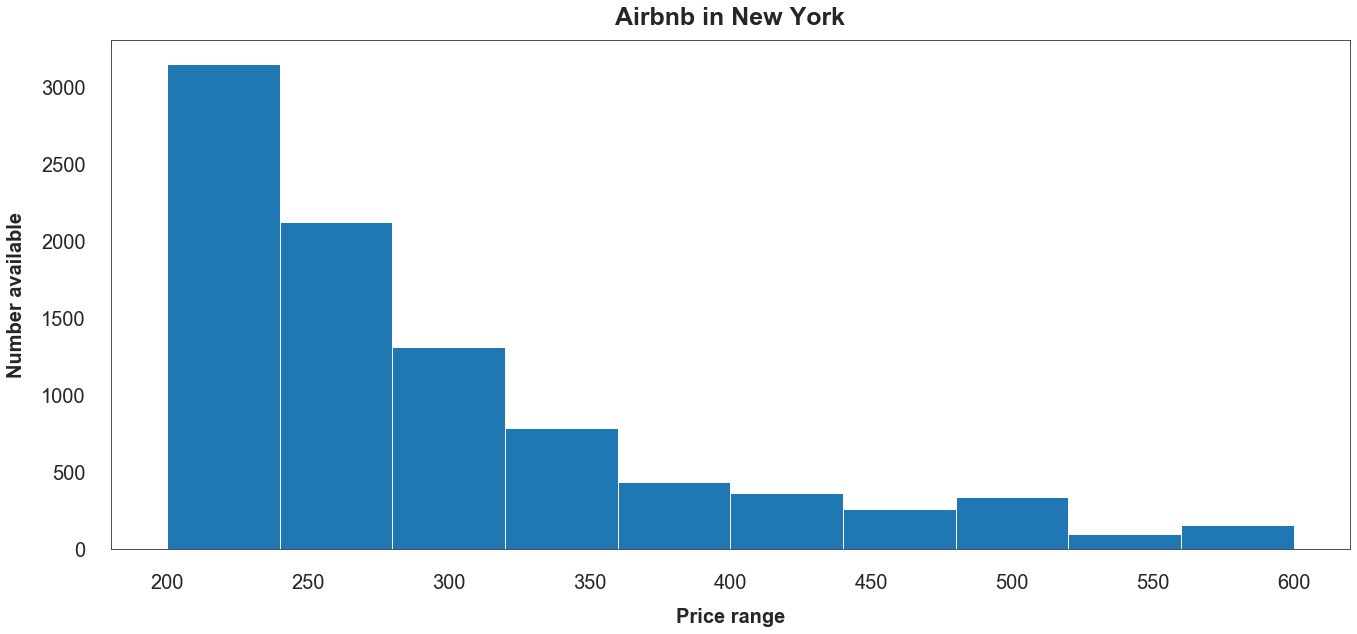

In [3]:
start_p = int(input('Pick the starting price: '))
limit_p = int(input('Pick the price limit: '))
plt.figure(figsize = (20,10))
filtro = (df.price >= start_p) & (df.price <= limit_p)
plt.rc('font', weight = 'normal')
plt.title('Airbnb in New York', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Price range', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Number available', weight = 'bold', fontsize = 20,  labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                
plt.tight_layout(pad = 5) 
plt.hist(df.price[filtro])
plt.show()

<div class="alert alert-block alert-info">
<b>Geografical scatter chart of New York</b>
</div>

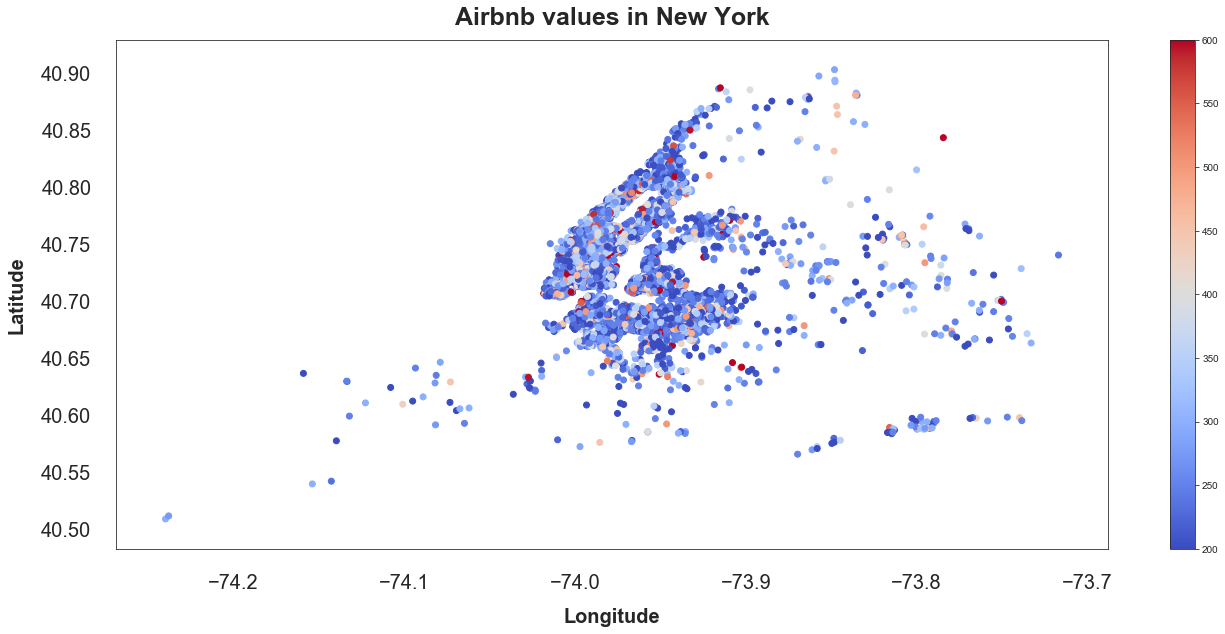

In [4]:
plt.figure(figsize = (20,10))
df_manh = df[df.neighbourhood_group == 'Manhattan']
plt.rc('font', weight = 'normal')
plt.title('Airbnb values in New York', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Longitude', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Latitude', weight = 'bold', fontsize = 20,  labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                
plt.tight_layout(pad = 5) 
plt.scatter(x = df.longitude[filtro], y = df.latitude[filtro], c = df.price[filtro],  cmap = 'coolwarm', alpha = 1)
plt.colorbar()
plt.show()

<div class="alert alert-block alert-info">
<b>Create Brooklyn object</b>
</div>

In [5]:
df_Bro = df[df.neighbourhood_group == 'Brooklyn']
print(df.neighbourhood_group.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


<div class="alert alert-block alert-info">
<b>Bar chart of Brooklyn</b>
</div>

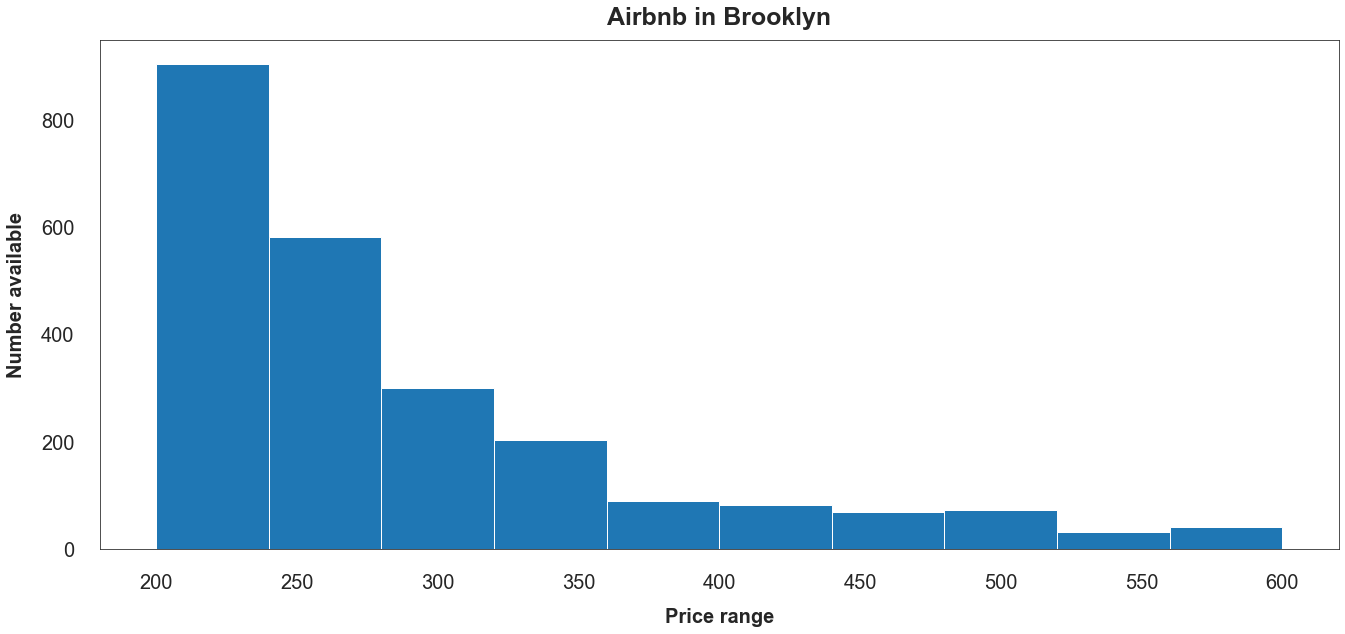

In [6]:
df.neighbourhood_group.unique()
plt.figure(figsize = (20,10))
df_Bro = df[df.neighbourhood_group == 'Brooklyn']
plt.rc('font', weight = 'normal')
plt.title('Airbnb in Brooklyn', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Price range', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Number available', weight = 'bold', fontsize = 20,  labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                
plt.tight_layout(pad = 5) 
plt.hist(df_Bro.price[filtro])
plt.show()

<div class="alert alert-block alert-info">
<b>Geografical scatter chart of manhattan</b>
</div>

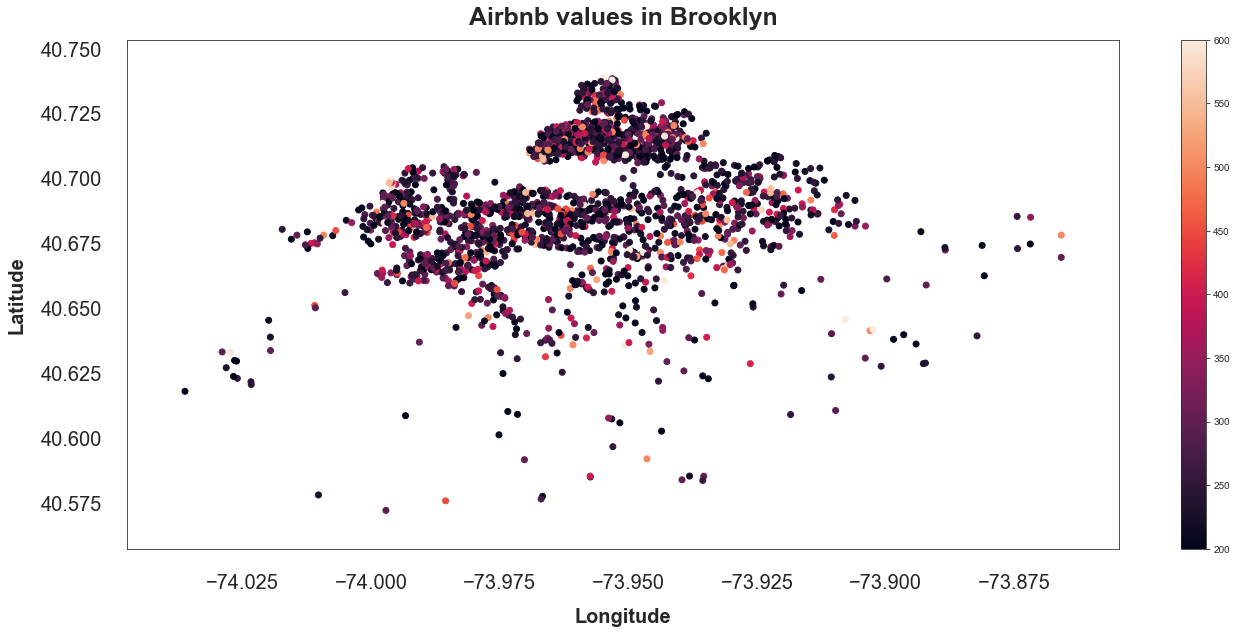

In [7]:
plt.figure(figsize = (20,10))
plt.rc('font', weight = 'normal')
plt.title('Airbnb values in Brooklyn', weight = 'bold', fontsize = 25, pad= 15)
plt.xlabel('Longitude', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Latitude', weight = 'bold', fontsize = 20,  labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10,)                                
plt.tight_layout(pad = 5) 
plt.scatter(x = df_Bro.longitude[filtro], y = df_Bro.latitude[filtro], c = df_Bro.price[filtro])
plt.colorbar()
plt.show()